**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции(список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
#%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.neighbors = n_neighbors
        self.algo = algorithm
    
    def fit(self, X, y):
        self.X = np.copy(X).astype(float)
        self.y = np.copy(y)
        self.classes = np.unique(y)
        self.n_classes = self.classes.shape[0]
        self.distanse_y = (self.X ** 2).sum(axis = 1)
    
    def predict(self, X):
        if self.algo == "brute":
            return self.solve_brute(X)
        elif self.algo == "kd_tree":
            return self.solve_kdtree(X)
        
    def predict_proba(self, X):
        if self.algo == 'brute':
            return self.solve_proba_brute(X)
        elif self.algo == 'kd_tree':
            return self.solve_proba_kdtree(X)
    
    def solve_brute(self, X):
        X = X.astype(float)
        distance_x = (X ** 2).sum(axis=1)
        distanse_x_y = X.dot(self.X.T) 
        dist = self.distanse_y - 2 * distanse_x_y + distance_x.reshape(-1, 1)
        new_distance = np.sqrt(dist)
        args = np.argsort(new_distance)
        predict = self.y[args[:, :self.neighbors]]
        return stats.mode(predict.T)[0].reshape(-1) 
    
    def solve_proba_brute(self, X):
        X = X.astype(float)
        distance_x = (X ** 2).sum(axis=1)
        distanse_x_y = X.dot(self.X.T)
        dist = self.distanse_y - 2 * distanse_x_y + distance_x.reshape(-1, 1)
        new_distance = np.sqrt(dist)
        
        args = np.argsort(new_distance)
        nearest = args[:,:self.neighbors]
        predict = np.zeros((np.shape(X)[0], np.shape(self.classes)[0]))
        for i in range(np.shape(nearest)[0]):
            for j in nearest[i]:
                predict[i][int(self.y[j])] += 1
        return predict / self.neighbors

    def solve_kdtree(self, X):
        X = X.astype(float)
        tree = KDTree(self.X, leaf_size=70)
        _, ind = tree.query(X, k=self.neighbors)
        predict = self.y[ind].T
        return stats.mode(predict)[0].reshape(-1)

    def solve_proba_kdtree(self, X):
        X = X.astype(float)
        tree = KDTree(self.X, leaf_size=50)
        _, near = tree.query(X, k=self.neighbors)
        
        predict = np.zeros((np.shape(X)[0], np.shape(self.classes)[0]))
        for i in range(np.shape(near)[0]):
            for j in near[i]:
                predict[i][int(self.y[j])] += 1
        return predict / self.neighbors

    def score(self, X, y):
        new_ans = np.subtract(self.predict(X), y)
        summ = np.count_nonzero(new_ans)
        return 1 - summ / y.shape[0]

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 1.42 ms, sys: 500 µs, total: 1.92 ms
Wall time: 3 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 316 µs, sys: 163 µs, total: 479 µs
Wall time: 381 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 1.18 ms, sys: 270 µs, total: 1.45 ms
Wall time: 1.29 ms


array([2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 4.38 ms, sys: 6.02 ms, total: 10.4 ms
Wall time: 16.8 ms


array([2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.03 ms, sys: 357 µs, total: 1.38 ms
Wall time: 1.1 ms


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 796 µs, sys: 655 µs, total: 1.45 ms
Wall time: 733 µs


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

Best number of neigbors is 18


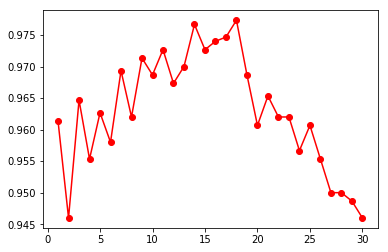

In [14]:
#%%pycodestyle
MAX_neighbors = 30
TESTS = 100
answer = []

for i in range(1, MAX_neighbors + 1):
    testing_results = []
    for j in range(TESTS):
        X_train, X_test, y_train, y_test = train_test_split(
            iris.data, iris.target,
            test_size=0.1, stratify=iris.target
        )
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        testing_results.append(my_clf.score(X_test, y_test))
    answer.append(np.mean(testing_results))

BESTS = np.argmax(answer) + 1
print("Best number of neigbors is {}".format(BESTS))

plt.plot(list(range(1, MAX_neighbors+1)), answer, 'ro-')
plt.show()

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 36.6 s, sys: 483 ms, total: 37.1 s
Wall time: 37.8 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 531 ms, sys: 849 ms, total: 1.38 s
Wall time: 1.92 s


In [20]:
%time clf.predict(X_test)

CPU times: user 1min 3s, sys: 674 ms, total: 1min 4s
Wall time: 1min 6s


array([1., 7., 5., 5., 2., 2., 7., 8., 8., 5., 0., 9., 2., 8., 8., 1., 5.,
       4., 8., 0., 6., 2., 7., 1., 5., 9., 0., 0., 5., 7., 0., 6., 7., 0.,
       5., 8., 5., 1., 8., 1., 0., 4., 7., 9., 6., 0., 9., 1., 9., 3., 3.,
       1., 9., 7., 1., 3., 0., 6., 3., 8., 0., 8., 4., 8., 6., 9., 3., 3.,
       0., 0., 0., 2., 4., 3., 7., 5., 1., 6., 2., 9., 2., 1., 3., 6., 9.,
       5., 4., 1., 7., 0., 3., 5., 6., 6., 3., 9., 3., 1., 9., 2., 4., 5.,
       0., 6., 1., 8., 0., 3., 2., 5., 5., 2., 2., 5., 9., 5., 3., 6., 7.,
       6., 0., 1., 2., 6., 5., 9., 6., 4., 2., 3., 9., 4., 9., 6., 5., 1.,
       1., 6., 3., 6., 1., 4., 8., 7., 6., 1., 6., 2., 2., 9., 1., 3., 3.,
       6., 2., 6., 4., 5., 3., 8., 0., 7., 3., 1., 3., 0., 6., 0., 7., 8.,
       2., 0., 0., 8., 1., 5., 7., 6., 3., 8., 7., 1., 7., 4., 4., 7., 8.,
       5., 1., 2., 2., 4., 1., 1., 4., 7., 6., 8., 8., 3., 9., 4., 0., 1.,
       1., 7., 8., 1., 4., 5., 2., 7., 7., 2., 2., 3., 1., 0., 5., 0., 7.,
       7., 3., 3., 9., 8.

In [21]:
%time my_clf.predict(X_test)

CPU times: user 9.08 s, sys: 2.22 s, total: 11.3 s
Wall time: 11.4 s


array([1., 7., 5., 5., 2., 2., 7., 8., 8., 5., 0., 9., 2., 8., 8., 1., 5.,
       4., 8., 0., 6., 2., 7., 1., 5., 9., 0., 0., 5., 7., 0., 6., 7., 0.,
       5., 8., 5., 1., 8., 1., 0., 4., 7., 9., 6., 0., 9., 1., 9., 3., 3.,
       1., 9., 7., 1., 3., 0., 6., 3., 8., 0., 8., 4., 8., 6., 9., 3., 3.,
       0., 0., 0., 2., 4., 3., 7., 5., 1., 6., 2., 9., 2., 1., 3., 6., 9.,
       5., 4., 1., 7., 0., 3., 5., 6., 6., 3., 9., 3., 1., 9., 2., 4., 5.,
       0., 6., 1., 8., 0., 3., 2., 5., 5., 2., 2., 5., 9., 5., 3., 6., 7.,
       6., 0., 1., 2., 6., 5., 9., 6., 4., 2., 3., 9., 4., 9., 6., 5., 1.,
       1., 6., 3., 6., 1., 4., 8., 7., 6., 1., 6., 2., 2., 9., 1., 3., 3.,
       6., 2., 6., 4., 5., 3., 8., 0., 7., 3., 1., 3., 0., 6., 0., 7., 8.,
       2., 0., 0., 8., 1., 5., 7., 6., 3., 8., 7., 1., 7., 4., 4., 7., 8.,
       5., 1., 2., 2., 4., 1., 1., 4., 7., 6., 8., 8., 3., 9., 4., 0., 1.,
       1., 7., 8., 1., 4., 5., 2., 7., 7., 2., 2., 3., 1., 0., 5., 0., 7.,
       7., 3., 3., 9., 8.

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 1min 1s, sys: 839 ms, total: 1min 2s
Wall time: 1min 3s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 7.56 s, sys: 1.54 s, total: 9.1 s
Wall time: 8.33 s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
clf.score(X_test, y_test)

0.96

In [25]:
my_clf.score(X_test, y_test)

0.96

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 42.2 s, sys: 637 ms, total: 42.8 s
Wall time: 43.4 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 521 ms, sys: 670 ms, total: 1.19 s
Wall time: 878 ms


In [30]:
%time clf.predict(X_test)

CPU times: user 1min 1s, sys: 485 ms, total: 1min 1s
Wall time: 1min 3s


array([0., 3., 2., 0., 1., 1., 6., 9., 8., 4., 4., 2., 4., 1., 3., 2., 8.,
       0., 1., 1., 5., 8., 5., 4., 2., 9., 4., 4., 7., 2., 5., 6., 0., 1.,
       7., 3., 0., 9., 9., 9., 6., 5., 4., 9., 7., 5., 1., 3., 5., 3., 2.,
       6., 1., 7., 9., 8., 8., 0., 4., 6., 1., 8., 7., 2., 4., 4., 0., 3.,
       1., 0., 0., 8., 3., 7., 2., 2., 6., 7., 2., 1., 9., 3., 0., 3., 9.,
       0., 1., 3., 7., 9., 0., 7., 9., 8., 1., 6., 3., 1., 7., 9., 6., 8.,
       1., 3., 0., 7., 8., 1., 7., 7., 3., 3., 8., 0., 9., 3., 1., 1., 0.,
       5., 1., 9., 3., 4., 0., 0., 0., 7., 5., 4., 3., 0., 8., 2., 5., 8.,
       4., 3., 9., 9., 6., 2., 1., 9., 3., 7., 1., 3., 7., 6., 2., 9., 1.,
       0., 0., 7., 5., 0., 2., 9., 5., 6., 3., 9., 3., 5., 0., 7., 4., 6.,
       6., 9., 6., 3., 1., 9., 1., 7., 5., 8., 8., 6., 1., 1., 4., 0., 2.,
       3., 2., 9., 1., 3., 5., 6., 3., 5., 0., 5., 4., 7., 5., 8., 9., 5.,
       7., 8., 9., 3., 8., 4., 8., 4., 3., 8., 9., 3., 7., 4., 5., 0., 1.,
       2., 3., 0., 6., 4.

In [31]:
%time my_clf.predict(X_test)

CPU times: user 1min 33s, sys: 1.29 s, total: 1min 35s
Wall time: 1min 36s


array([0., 3., 2., 0., 1., 1., 6., 9., 8., 4., 4., 2., 4., 1., 3., 2., 8.,
       0., 1., 1., 5., 8., 5., 4., 2., 9., 4., 4., 7., 2., 5., 6., 0., 1.,
       7., 3., 0., 9., 9., 9., 6., 5., 4., 9., 7., 5., 1., 3., 5., 3., 2.,
       6., 1., 7., 9., 8., 8., 0., 4., 6., 1., 8., 7., 2., 4., 4., 0., 3.,
       1., 0., 0., 8., 3., 7., 2., 2., 6., 7., 2., 1., 9., 3., 0., 3., 9.,
       0., 1., 3., 7., 9., 0., 7., 9., 8., 1., 6., 3., 1., 7., 9., 6., 8.,
       1., 3., 0., 7., 8., 1., 7., 7., 3., 3., 8., 0., 9., 3., 1., 1., 0.,
       5., 1., 9., 3., 4., 0., 0., 0., 7., 5., 4., 3., 0., 8., 2., 5., 8.,
       4., 3., 9., 9., 6., 2., 1., 9., 3., 7., 1., 3., 7., 6., 2., 9., 1.,
       0., 0., 7., 5., 0., 2., 9., 5., 6., 3., 9., 3., 5., 0., 7., 4., 6.,
       6., 9., 6., 3., 1., 9., 1., 7., 5., 8., 8., 6., 1., 1., 4., 0., 2.,
       3., 2., 9., 1., 3., 5., 6., 3., 5., 0., 5., 4., 7., 5., 8., 9., 5.,
       7., 8., 9., 3., 8., 4., 8., 4., 3., 8., 9., 3., 7., 4., 5., 0., 1.,
       2., 3., 0., 6., 4.

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 1min 2s, sys: 578 ms, total: 1min 2s
Wall time: 1min 4s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 22s, sys: 608 ms, total: 1min 23s
Wall time: 1min 24s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [34]:
clf.score(X_test, y_test)

0.9657142857142857

In [35]:
my_clf.score(X_test, y_test)

0.9657142857142857

Задание 5

In [ ]:
#seaborn
"""Библиотека, отснованная на matplotlib, для визуализации данных"""
  
#matplotlib
"""Библиотека для построения графиков"""
  
#train_test_split
"""Разбитие данных на два массива: тренировочный и тестовый"""
  
#Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
"""Конвейр для последовательного преобразования данных"""
  
#StandardScaler (from sklearn.preprocessing import StandardScaler)
"""Преобразование данных к нормальному виду:
  распределение имет среднее значение 0 и стандартное отклонение 1"""
  
#ClassifierMixin
"""Базовый класс для классификаторов sklearn"""
  
#NeighborsBase
"""Базовый класс для KNN из sklearn"""
  
#KNeighborsMixin
"""Базовый класс для KNN, содаржащий методы поиска соседей"""
  
#SupervisedIntegerMixin
"""Базовый класс, содержащий метод fit() для обучения"""